# Histogram of Oriented Gradients (HOG) + Support Vector Machine (SVM)

### Setup & Data Exploration
Import libraries

In [1]:
import os
from tqdm import tqdm
import numpy as np
from PIL import Image
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Let's visualize some images to see what HOG does:

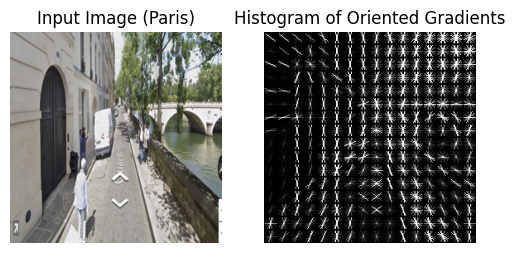

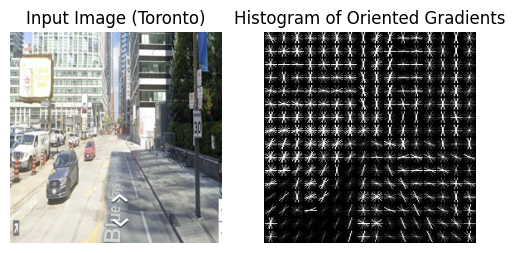

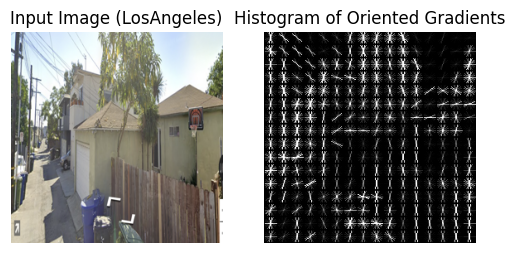

In [2]:
for city in ['Paris', 'Toronto', 'LosAngeles']:
    sample_img = Image.open('../../images/' + city + 'Resized/1.png')
    sample_img_array = np.array(sample_img)
    sample_img_features, sample_hog_img = hog(sample_img_array, visualize=True, pixels_per_cell=(16,16), channel_axis=2)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    ax1.axis('off')
    ax1.imshow(sample_img)
    ax1.set_title('Input Image (' + city + ')')
    sample_hog_image_rescaled = exposure.rescale_intensity(sample_hog_img, in_range=(0, 10))
    ax2.axis('off')
    ax2.imshow(sample_hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

### Preprocessing
Apply HOG to each image and split data into 80/20 for training and testing

In [3]:
HOG_list = []
class_list = []
for id, city in enumerate(tqdm(['Paris', 'Toronto', 'LosAngeles'])):
    for i in range(300):
        path = '../../images/' + city + 'Resized/' + str(i) + '.png'
        if os.path.isfile(path):
            img = Image.open(path)
            img_array = np.array(img)
            img_features = hog(img_array, pixels_per_cell=(16,16), channel_axis=2)
            HOG_list.append(img_features.tolist())
            class_list.append(id)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.38s/it]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(HOG_list, class_list, test_size=0.2, random_state=42, stratify=class_list)
print(len(X_train), len(X_test))

492 124


### Training
Set SVC as the base model. Grid search with 3-fold cross validation over kernel and regularization parameter (C) to find best hyperparameter values

In [5]:
base_svm = SVC()
param_grid = {'kernel':['linear', 'rbf'], 'C': [1, 10, 100]}
svm = GridSearchCV(base_svm, param_grid, cv=3, verbose=3)
svm.fit(X_train, y_train)
print(svm.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ................C=1, kernel=linear;, score=0.634 total time=   7.9s
[CV 2/3] END ................C=1, kernel=linear;, score=0.646 total time=   6.2s
[CV 3/3] END ................C=1, kernel=linear;, score=0.579 total time=   5.6s
[CV 1/3] END ...................C=1, kernel=rbf;, score=0.695 total time=  17.2s
[CV 2/3] END ...................C=1, kernel=rbf;, score=0.665 total time=   8.4s
[CV 3/3] END ...................C=1, kernel=rbf;, score=0.628 total time=   8.7s
[CV 1/3] END ...............C=10, kernel=linear;, score=0.634 total time=   7.2s
[CV 2/3] END ...............C=10, kernel=linear;, score=0.646 total time=   4.6s
[CV 3/3] END ...............C=10, kernel=linear;, score=0.579 total time=   9.7s
[CV 1/3] END ..................C=10, kernel=rbf;, score=0.707 total time=   6.9s
[CV 2/3] END ..................C=10, kernel=rbf;, score=0.683 total time=  14.8s
[CV 3/3] END ..................C=10, kernel=rbf;,

### Evaluation
Check accuracy and plot confusion matrix

In [6]:
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6854838709677419


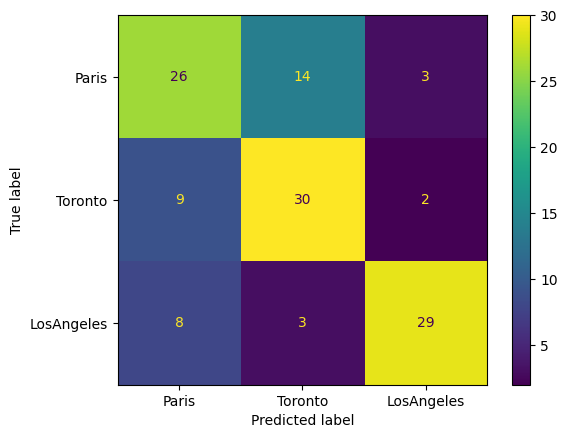

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Paris', 'Toronto', 'LosAngeles'])
conf_disp.plot()
plt.show()